<a href="https://colab.research.google.com/github/Jordan3448/ComputerVision/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***What is Segmentation?***

**Definition 1**: dividing an image into a finite set of useful *contuguous* regions. <br>
**Definition 2**: assigning each pixel membership in one of a small set of object candidates.

***Why is segmentation so hard?***

* *meaningful* and *useful* are not well defined.
* the same physical world can generate many different 2D representations. (i.e. segmentation is an *inverse problem*)
* 

**Chinese Room** - the argument/concept that an AI may not really *know* or *deeply understand* the matter it is dealing with and merely mimicking the process that a person in a room who doesn't understand a language recieves one language in and spits out another language using translation tables without understanding the language.



In [2]:
#kMeans
import cv2
import matplotlib.pyplot as plt
import numpy as np

print("modules loaded")

modules loaded


In [3]:
#get an image in the local environment
!wget 'https://media.istockphoto.com/photos/donut-with-sprinkles-isolated-picture-id538335769?k=20&m=538335769&s=612x612&w=0&h=A1DAZd6aHjfRyq2qKAKuBD9KAf0cq1LXKW8mpvTxKgU='

--2022-10-14 16:41:46--  https://media.istockphoto.com/photos/donut-with-sprinkles-isolated-picture-id538335769?k=20&m=538335769&s=612x612&w=0&h=A1DAZd6aHjfRyq2qKAKuBD9KAf0cq1LXKW8mpvTxKgU=
Resolving media.istockphoto.com (media.istockphoto.com)... 18.64.174.122, 18.64.174.65, 18.64.174.9, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|18.64.174.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65287 (64K) [image/jpeg]
Saving to: ‘donut-with-sprinkles-isolated-picture-id538335769?k=20&m=538335769&s=612x612&w=0&h=A1DAZd6aHjfRyq2qKAKuBD9KAf0cq1LXKW8mpvTxKgU=’

donut-with-sprinkle 100%[===================>]  63.76K  --.-KB/s    in 0.02s   

2022-10-14 16:41:46 (2.97 MB/s) - ‘donut-with-sprinkles-isolated-picture-id538335769?k=20&m=538335769&s=612x612&w=0&h=A1DAZd6aHjfRyq2qKAKuBD9KAf0cq1LXKW8mpvTxKgU=’ saved [65287/65287]



In [6]:
#rename image to easy call tag
!mv 'donut-with-sprinkles-isolated-picture-id538335769?k=20&m=538335769&s=612x612&w=0&h=A1DAZd6aHjfRyq2qKAKuBD9KAf0cq1LXKW8mpvTxKgU=' Donut.jpg

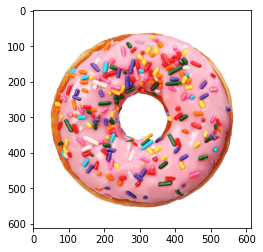

(612, 612, 3)

In [11]:
# verify image works after correcting colors
img = cv2.imread('Donut.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

In [17]:
#convert from tensor to matrix
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
twoDimage.shape

(374544, 3)

In [18]:
#run the k-means algorithm
ret, label, center = cv2.kmeans(twoDimage, 3, None, 
                                (cv2.TERM_CRITERIA_MAX_ITER, 1000, 0), 
                                5, cv2.KMEANS_PP_CENTERS)

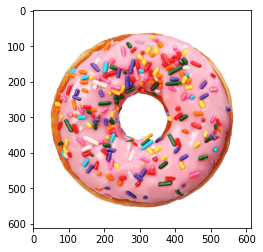

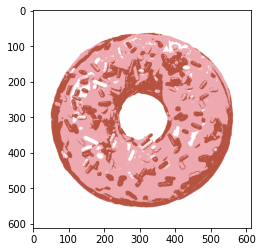

In [28]:
center = np.uint8(center)
res = center[label.flatten()]
new_image = res.reshape((img.shape))
plt.imshow(img)
plt.figure()
plt.imshow(new_image)
plt.show()